In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load`

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.integrate import odeint
import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
t_arr = np.linspace(0, 10, 1000)

In [4]:
def dynamics_model_with_damper(X, t, M1, b1, k1, M2, b2, k2, force_arr,t_arr):
    
#     t_arr=list(t_arr)
#     print(t)
#     print(t_arr)
#     idx=t_arr.index(t)
    F=force_arr[0]
    
    
    
    
    if (t in t_arr):
        t_arr=list(t_arr)
        idx=t_arr.index(t)
        F=force_arr[idx]
    else:
        diff_arr=np.absolute(t_arr-t)
        idx=diff_arr.argmin()
        F=force_arr[idx]
#     print(F)
#     deltaT = 1
#     if t <= deltaT:
#         print(t)
#         F = force_arr[int(np.floor(t/deltaT))]
#         print(int(np.floor(t/deltaT)))
#         print(F)
#     else:
#         F = 0
    
    a3 = (M1*b2+(b1+b2)*M2)/(M1*M2)
    a2 = (M1*k2+b1*b2+(k1+k2)*M2)/(M1*M2)
    a1 = (b1*k2+k1*b2)/(M1*M2)
    a0 = (k1*k2)/(M1*M2)
    
    dx1 = X[1]
    dx2 = X[2]
    dx3 = X[3]
    dx4 = -a0*X[0]-a1*X[1]-a2*X[2]-a3*X[3]+F
    
    return [dx1, dx2, dx3, dx4]

In [5]:
def output_model_with_damper(X_arr, M1, b1, k1, M2, b2, k2):
    
    b0 = k2/(M1*M2)
    b1 = b2/(M1*M2)
    b2 = M2/(M1*M2)
    C = np.array([b0, b1, b2, 0])
    
    y_arr = np.matmul(C, np.transpose(X_arr))
    
    return y_arr

In [6]:
def time_dynamics(param,t_arr):
    X0 = [0, 0, 0, 0]
#     t_arr = np.linspace(0, 10, 1000)
    #dt=0.001
    # Generate random force array
    force_arr = np.random.uniform(low=0, high=100, size=len(t_arr))
    
    # With damper
    M1, b1, k1, M2, b2, k2 = param[0], param[1], param[2], param[3], param[4], param[5]
    X_arr = odeint(dynamics_model_with_damper, X0, t_arr, args=(M1, b1, k1, M2, b2, k2, force_arr,t_arr))
    y_arr = output_model_with_damper(X_arr, M1, b1, k1, M2, b2, k2)
    
    return y_arr, force_arr,X_arr

In [7]:
# Skyscraper parameters
M1, b1, k1 = 5.11, 0.767, 2024
# Tuned Mass Damper parameters
M2, b2, k2 = 0.87, 8.9, 185

param = [M1, b1, k1, M2, b2, k2]
y_arr_with_damper, force_arr,x_arr = time_dynamics(param,t_arr)

In [8]:
print(len(force_arr))
print(len(t_arr))
print(len(x_arr))
len(y_arr_with_damper)

1000
1000
1000


1000

Text(0, 0.5, 'Displacement (in m)')

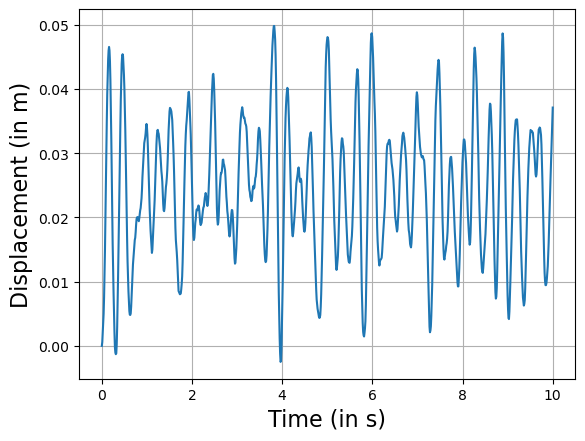

In [9]:
plt.plot(t_arr, y_arr_with_damper, label='With Damper')

plt.grid()

plt.xlabel('Time (in s)', fontsize=16)
plt.ylabel('Displacement (in m)', fontsize=16)

In [10]:
df_state=pd.DataFrame(x_arr,columns=['x1','x2','x3','x4'])

In [11]:
np_inout=np.vstack([force_arr,y_arr_with_damper,t_arr]).T
df_inout=pd.DataFrame(np_inout,columns=['forces_generated','displacemnet','time'])

In [12]:
df=pd.concat([df_inout,df_state],axis=1)
df.head()

,forces_generated,displacemnet,time,x1,x2,x3,x4
0,65.072185,0.000000,0.00000,0.000000e+00,0.000000,0.000000,0.000000
1,47.889610,0.000590,0.01001,2.607409e-08,0.000010,0.002905,0.523482
2,2.272743,0.002002,0.02002,3.755657e-07,0.000071,0.009425,0.654766
3,3.518157,0.003463,0.03003,1.660554e-06,0.000196,0.015339,0.525218
4,73.557130,0.004993,0.04004,4.472820e-06,0.000375,0.020730,0.716033


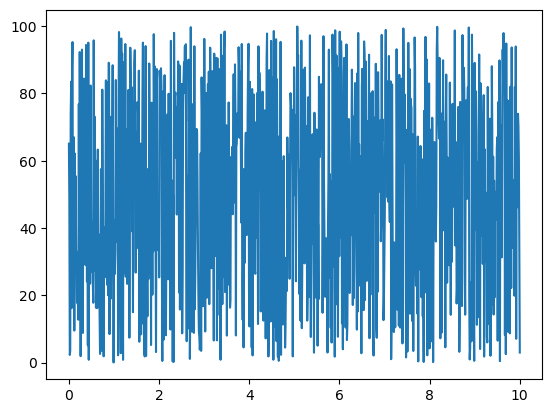

In [13]:
plt.plot(df['time'],df['forces_generated'])

In [14]:
#define window size
def wind_reshape(arr,window_size):
    X = []
    for i in range(len(arr) - window_size):
        X.append(arr[i:i+window_size])
    return np.array(X)

In [15]:
window_size=10
new_data=wind_reshape(df[['displacemnet','forces_generated','time']],window_size)

In [16]:
new_data[0]

array([[0.00000000e+00, 6.50721846e+01, 0.00000000e+00],
       [5.89852079e-04, 4.78896102e+01, 1.00100100e-02],
       [2.00167777e-03, 2.27274252e+00, 2.00200200e-02],
       [3.46281542e-03, 3.51815659e+00, 3.00300300e-02],
       [4.99296226e-03, 7.35571296e+01, 4.00400400e-02],
       [7.57354958e-03, 8.35356021e+01, 5.00500501e-02],
       [1.12313470e-02, 1.61738870e+01, 6.00600601e-02],
       [1.50220009e-02, 8.75480038e+01, 7.00700701e-02],
       [1.96856341e-02, 9.52598383e+01, 8.00800801e-02],
       [2.51641567e-02, 3.68819091e+01, 9.00900901e-02]])

In [17]:
def train_test_split(new_data,df,window_size):
    train_size = 0.8
    num_samples = len(new_data)
    train_samples = int(num_samples * train_size)
    test_samples = num_samples - train_samples
    X_train = new_data[window_size:train_samples]
    y_train = df[['x1', 'x2', 'x3', 'x4']][window_size:train_samples]
    X_test = new_data[train_samples:num_samples - window_size]
    y_test = df[['x1', 'x2', 'x3', 'x4']][train_samples:num_samples - window_size]
    return X_train,X_test,y_train,y_test

In [18]:
X_train,X_test,y_train,y_test=train_test_split(new_data,df,window_size)

In [19]:
def reshape(data):
    n_samples, width, height = data.shape
    data = data.reshape((n_samples, width * height))
    return data

X_train=reshape(X_train)
X_test=reshape(X_test)

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
# reg= RandomForestRegressor(max_depth=2, random_state=0)
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [21]:
y_test=np.array(y_test)
y_test[23]

array([ 0.0007048 , -0.00065121, -0.06270459,  0.62414005])

In [22]:
y_pred=reg.predict(X_test)
y_pred[23]

array([ 0.0007048 , -0.0006512 , -0.06270431,  0.62413317])

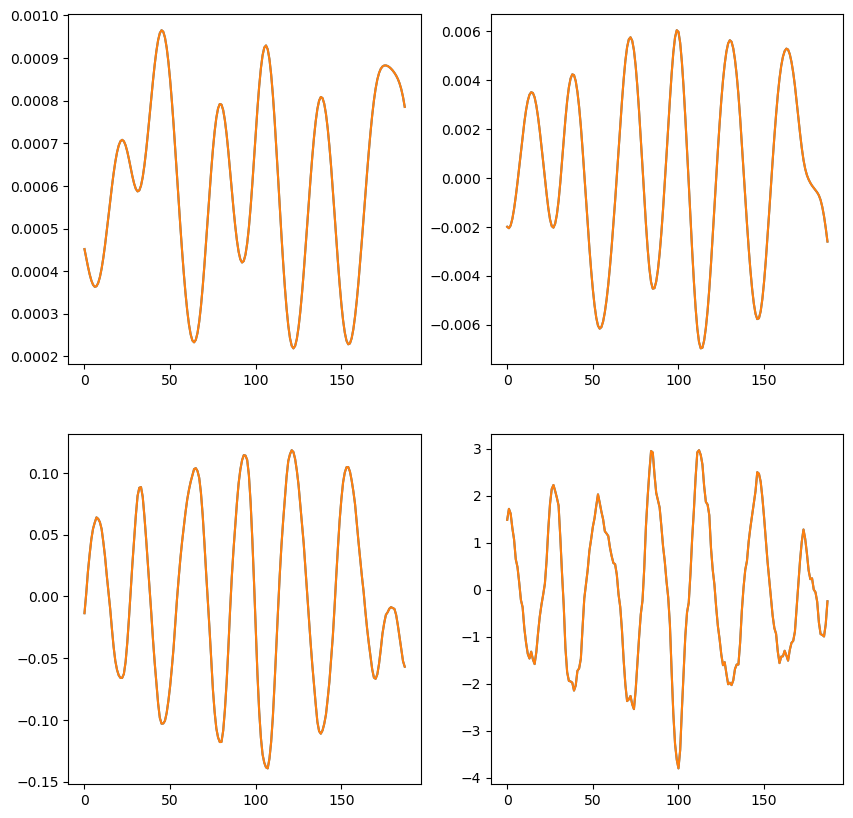

In [23]:
plt.figure(figsize=(10,10))
for i in range(4):
    
    plt.subplot(2,2,i+1)
    plt.plot(y_pred[:,i])
    plt.plot(y_test[:,i])

In [24]:
from sklearn.metrics import  mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('mean absolute error',mae)
print('mean square error',mse)

mean absolute error 1.5145044441341693e-06
mean square error 1.1304491627382952e-11


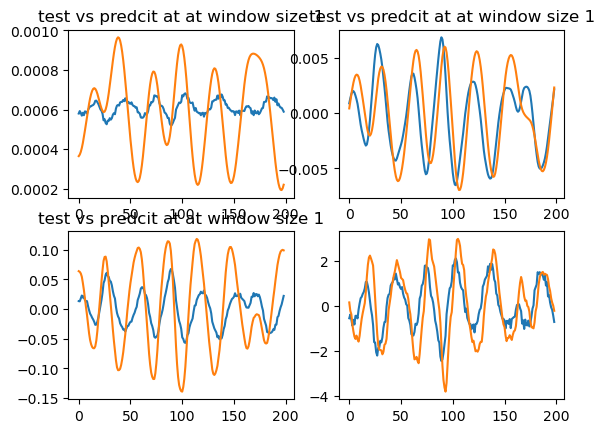

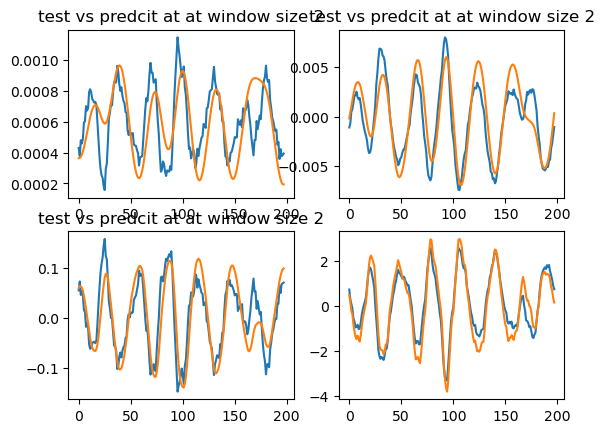

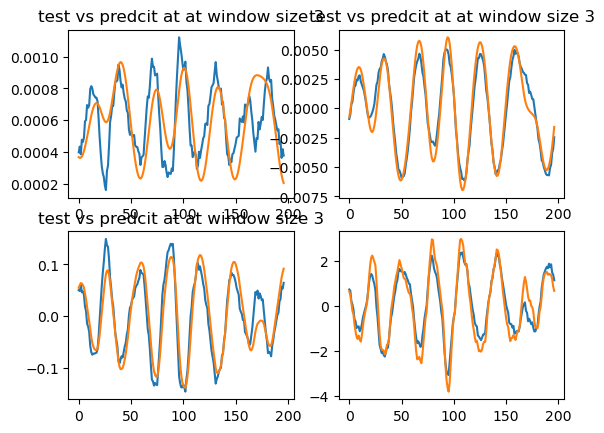

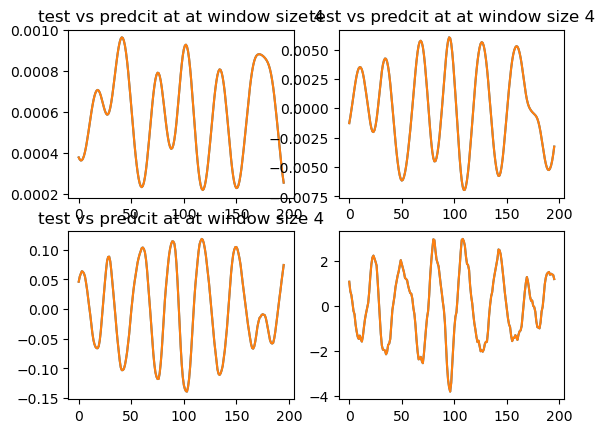

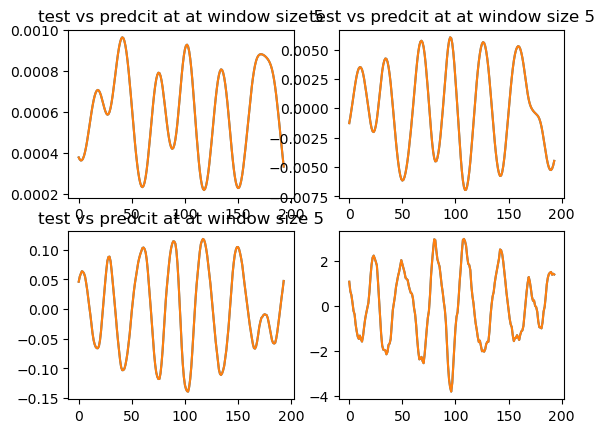

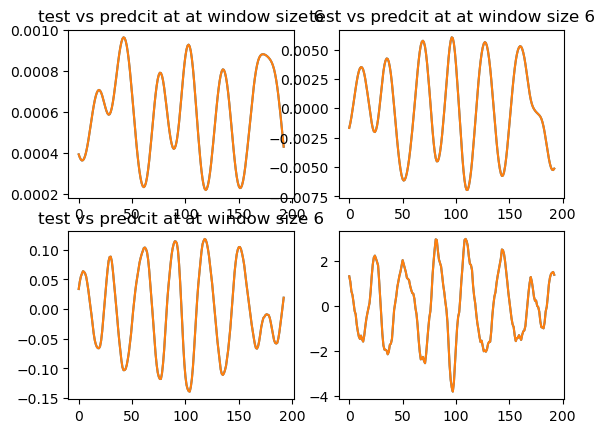

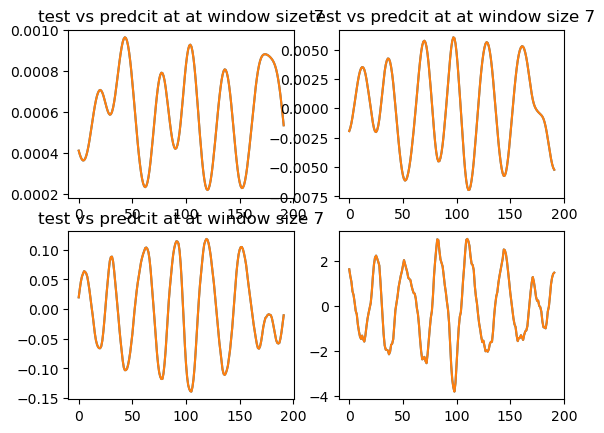

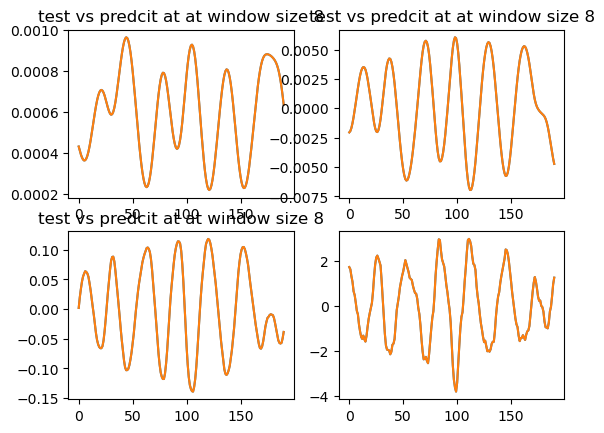

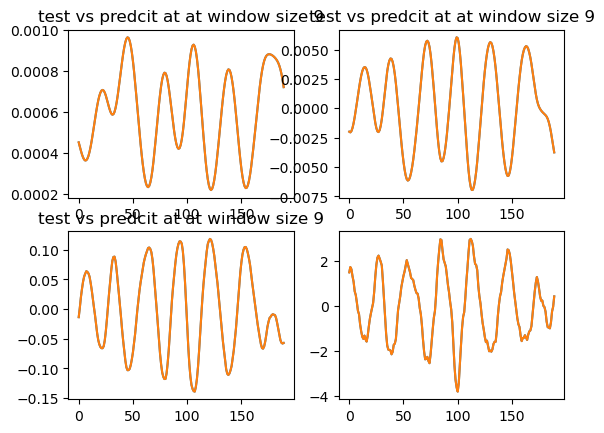

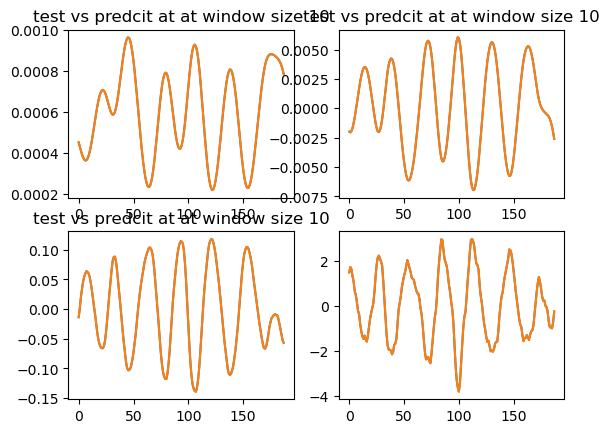

In [66]:
from sklearn.linear_model import LinearRegression

def results(df):
    window_sizes=[]
    mean_abs_error=[]
    mean_square_error=[]
    for i in range(1,11):

     
        new_data=wind_reshape(df[['displacemnet','forces_generated','time']],i)
        X_train,X_test,y_train,y_test=train_test_split(new_data,df,i)
        X_train=reshape(X_train)
        X_test=reshape(X_test)

        reg= LinearRegression().fit(X_train,y_train)
        y_pred=reg.predict(X_test)
        y_test=np.array(y_test)
        
        plt.figure()
        for j in range(4):
            plt.title('test vs predcit at at window size %d'%i)
            plt.subplot(2,2,j+1)
            plt.plot(y_pred[:,j])
            plt.plot(y_test[:,j])
        
        
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)

        window_sizes.append(i)
        mean_abs_error.append(mae)
        mean_square_error.append(mse)
    return window_sizes,mean_abs_error,mean_square_error
window_size,maes,msea=results(df)

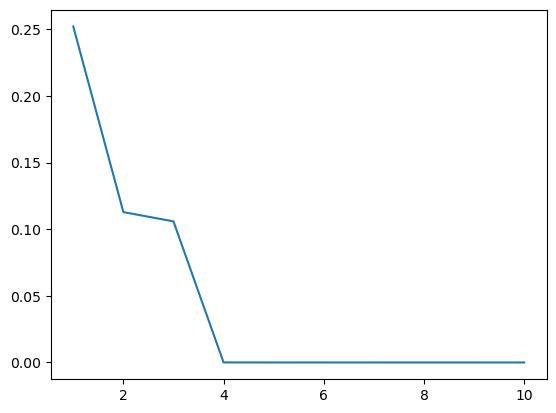

In [67]:
plt.plot(window_size,maes)#mean absolute error

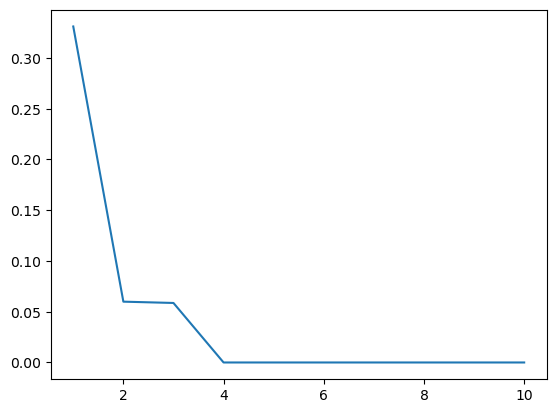

In [68]:
plt.plot(window_size,msea)#mean square error

# Approach1 creating data for a set of parameters and then train test split

In [28]:
mean_m2, std_m2 = 10, 5
mean_m1, std_m1 = 100, 20
mean_k2, std_k2 = 5000, 1000
mean_k1, std_k1 = 10000, 2000
mean_b1, std_b1 = 4, 1
mean_b2, std_b2 = 20, 5

In [29]:
m1 = np.random.normal(loc=mean_m1, scale=std_m1, size=100)
m2 = np.random.normal(loc=mean_m2, scale=std_m2, size=100)
k1 = np.random.normal(loc=mean_k1, scale=std_k1, size=100)
k2 = np.random.normal(loc=mean_k2, scale=std_k2, size=100)
b1 = np.random.normal(loc=mean_b1, scale=std_b1, size=100)
b2 = np.random.normal(loc=mean_b2, scale=std_b2, size=100)

In [30]:
m1 = np.abs(m1)
m2 = np.abs(m2)
k1 = np.abs(k1)
k2 = np.abs(k2)
b1 = np.abs(b1)
b2 = np.abs(b2)

In [31]:
def app1(t_arr,m1,m2,b1,b2,k1,k2):  
    from tqdm import tqdm 
    df_final = pd.DataFrame()#creating a final so as to append all dataframes
   
    for i in tqdm(range(100),total=100, desc='dataset creation'):
        param = [m1[i], b1[i], k1[i], m2[i], b2[i], k2[i]]#taking params from the set
        
        y_arr_with_damper, force_arr, x_arr = time_dynamics(param, t_arr)
        df_state = pd.DataFrame(x_arr, columns=['x1', 'x2', 'x3', 'x4'])
        #for each iteration setting params in the dataframe
        df_state['M1'] = m1[i]
        df_state['M2'] = m2[i]
        df_state['b1'] = b1[i]
        df_state['b2'] = b2[i]
        df_state['k1'] = k1[i]
        df_state['k2'] = k2[i]
        
        np_inout = np.vstack([force_arr, y_arr_with_damper, t_arr]).T
        df_inout = pd.DataFrame(np_inout, columns=['forces_generated', 'displacemnet', 'time'])
        df=pd.concat([df_inout,df_state],axis=1)
        df_final = df_final.append(df, ignore_index=True)
     
    window_size=10
    new_data=wind_reshape(df_final[['displacemnet','forces_generated','time','M1','M2','b1','b2','k1','k2']],window_size)
    X_train,X_test,y_train,y_test=train_test_split(new_data,df_final,window_size)
    X_train=reshape(X_train)
    X_test=reshape(X_test)
    
    return X_train,X_test,y_train,y_test

In [32]:
X_train,X_test,y_train,y_test=app1(t_arr,m1,m2,b1,b2,k1,k2)

dataset creation: 100%|██████████| 100/100 [04:20<00:00,  2.60s/it]


**linear regression model**

In [33]:
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred=reg.predict(X_test)
y_test=np.array(y_test)

In [35]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('mean absolute error',mae)
print('mean square error',mse)

mean absolute error 0.3586865803298023
mean square error 0.8535551818409172


**true vs predicted labels**

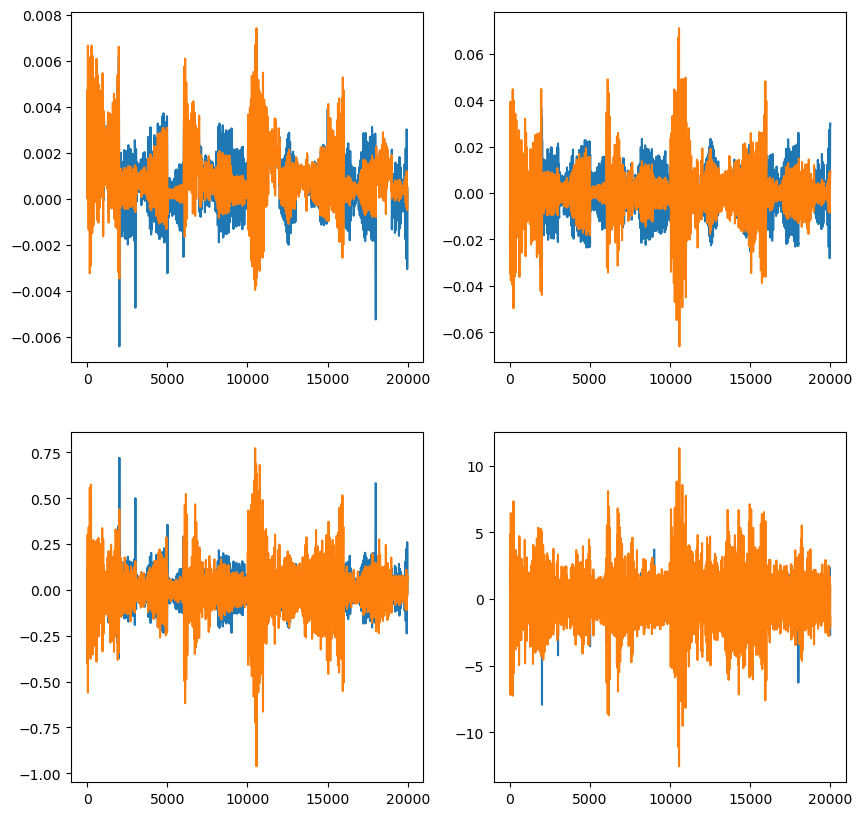

In [36]:
plt.figure(figsize=(10,10))
for i in range(4):
    
    plt.subplot(2,2,i+1)
    plt.plot(y_pred[:,i])
    plt.plot(y_test[:,i])

**random forest model**

In [38]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=25, random_state=0,max_depth=20)
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=25, random_state=0)

In [69]:
y_pred_rand=regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_rand)
mse = mean_squared_error(y_test, y_pred_rand)
print('mean absolute error',mae)
print('mean square error',mse)

mean absolute error 0.349870957080103
mean square error 0.8103935173408944


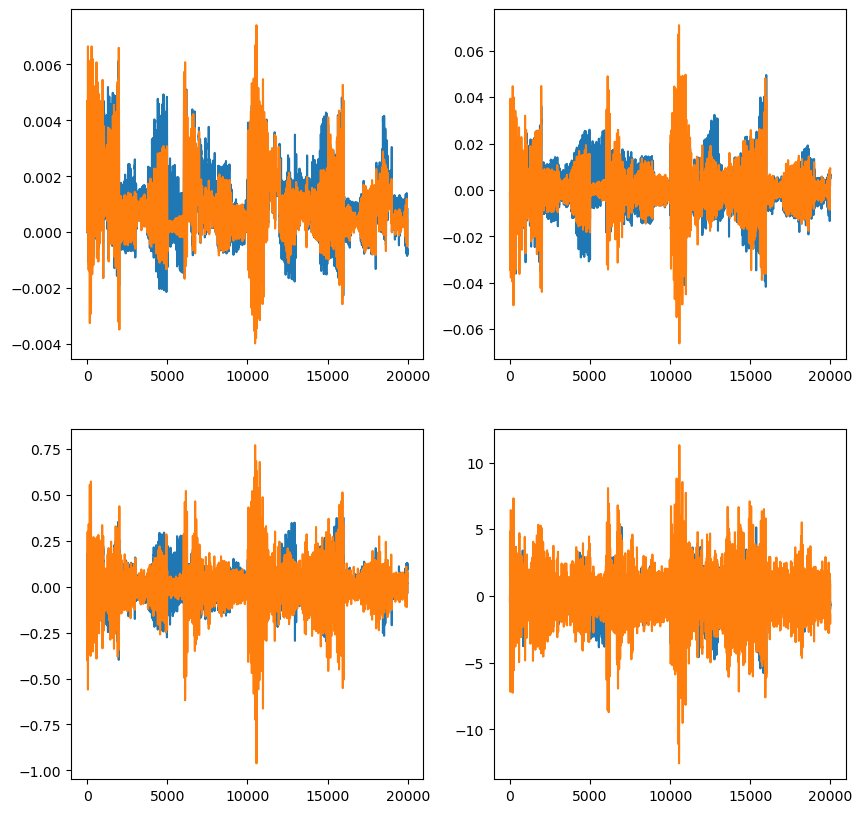

In [40]:
plt.figure(figsize=(10,10))
for i in range(4):
    
    plt.subplot(2,2,i+1)
    plt.plot(y_pred_rand[:,i])
    plt.plot(y_test[:,i])

**xgb model**

In [41]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42,max_depth=2).fit(X_train,y_train)
y_pred_xgb=xgb_model.predict(X_test)

In [42]:
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
print('mean absolute error',mae)
print('mean square error',mse)

mean absolute error 0.35469142989700614
mean square error 0.82892493045942


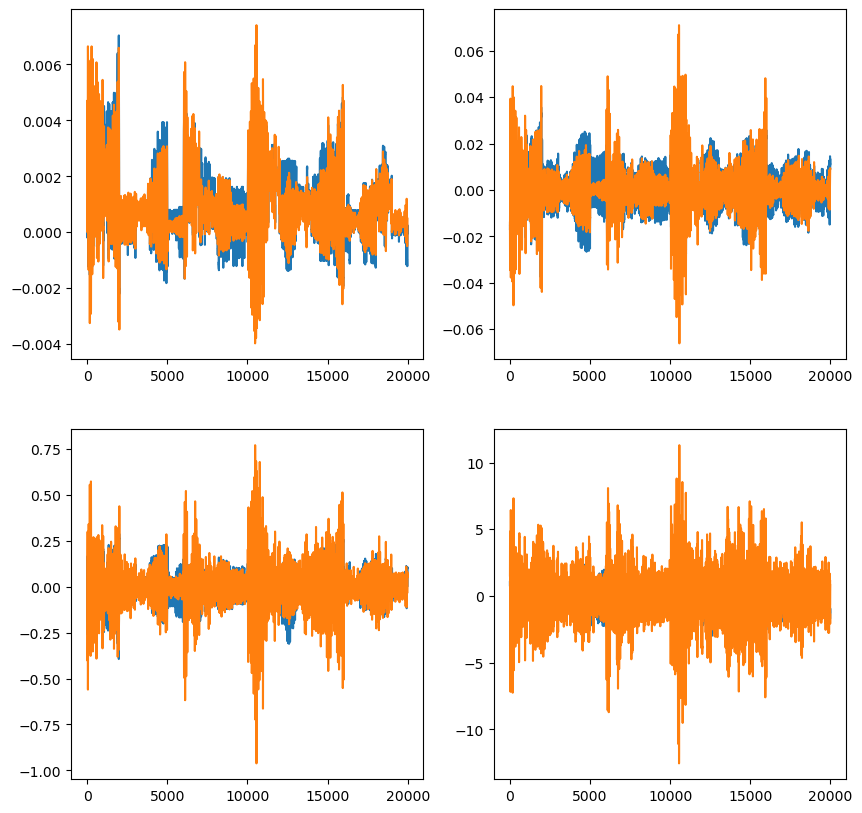

In [43]:
plt.figure(figsize=(10,10))
for i in range(4):
    
    plt.subplot(2,2,i+1)
    plt.plot(y_pred_xgb[:,i])
    plt.plot(y_test[:,i])

**average of above predictions**

In [44]:
y_ens=(y_pred+y_pred_xgb+y_pred_rand)/3
mae = mean_absolute_error(y_test, y_ens)
mse = mean_squared_error(y_test, y_ens)
print('mean absolute error',mae)
print('mean square error',mse)

mean absolute error 0.34870086253107135
mean square error 0.8056920204588278


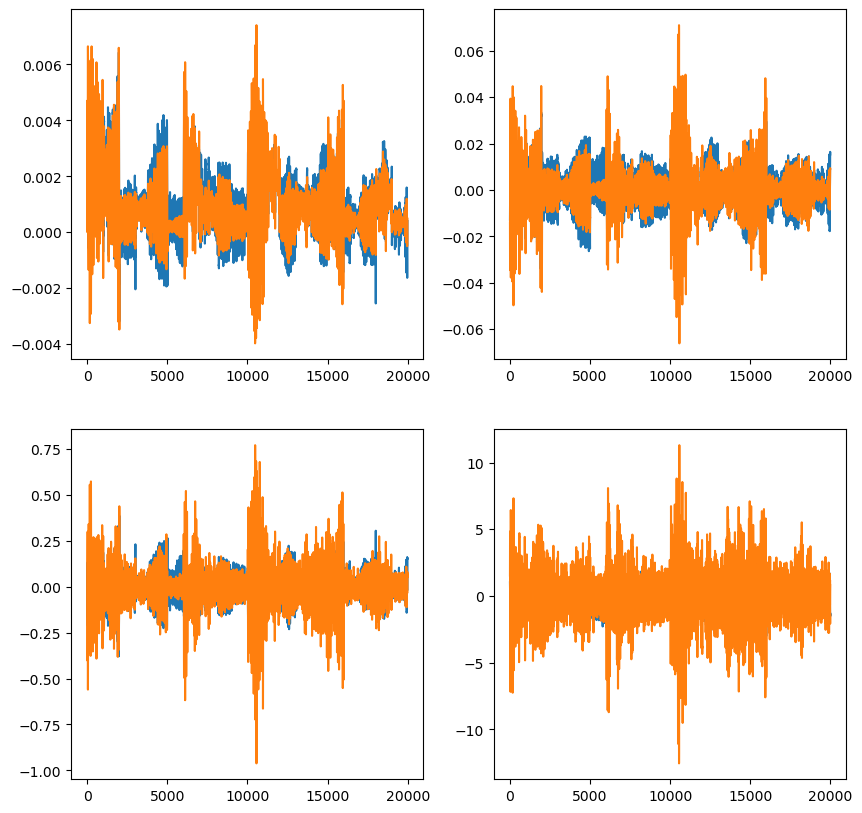

In [45]:
plt.figure(figsize=(10,10))
for i in range(4):
    
    plt.subplot(2,2,i+1)
    plt.plot(y_ens[:,i])
    plt.plot(y_test[:,i])

In [46]:
def train_test_split_v2(new,df,window_size):
   
  
    X = new[window_size:]
    y = df[['x1', 'x2', 'x3', 'x4']][window_size:]

    return X,y

# method 2 set of parameters for train and test

In [47]:
def app2_train(t_arr,m1,m2,b1,b2,k1,k2):  
    from tqdm import tqdm 
    df_final = pd.DataFrame()#creating a final so as to append all dataframes
   
    for i in tqdm(range(80),total=80, desc='dataset creation'):
        param = [m1[i], b1[i], k1[i], m2[i], b2[i], k2[i]]#taking params from the set
        
        y_arr_with_damper, force_arr, x_arr = time_dynamics(param, t_arr)
        df_state = pd.DataFrame(x_arr, columns=['x1', 'x2', 'x3', 'x4'])
        #for each iteration setting params in the dataframe
        df_state['M1'] = m1[i]
        df_state['M2'] = m2[i]
        df_state['b1'] = b1[i]
        df_state['b2'] = b2[i]
        df_state['k1'] = k1[i]
        df_state['k2'] = k2[i]
        
        np_inout = np.vstack([force_arr, y_arr_with_damper, t_arr]).T
        df_inout = pd.DataFrame(np_inout, columns=['forces_generated', 'displacemnet', 'time'])
        df=pd.concat([df_inout,df_state],axis=1)
        df_final = df_final.append(df, ignore_index=True)
     
    window_size=10
    new_data=wind_reshape(df_final[['displacemnet','forces_generated','time','M1','M2','b1','b2','k1','k2']],window_size)
    X,y,=train_test_split_v2(new_data,df_final,window_size)
    X=reshape(X)
  
    return X,y

In [48]:
def app2_test(t_arr,m1,m2,b1,b2,k1,k2):  
    from tqdm import tqdm 
    df_final = pd.DataFrame()#creating a final so as to append all dataframes
   
    for i in tqdm(range(20),total=20, desc='dataset creation'):
        param = [m1[i+80], b1[i+80], k1[i+80], m2[i+80], b2[i+80], k2[i+80]]#taking params from the set
        
        y_arr_with_damper, force_arr, x_arr = time_dynamics(param, t_arr)
        df_state = pd.DataFrame(x_arr, columns=['x1', 'x2', 'x3', 'x4'])
        #for each iteration setting params in the dataframe
        df_state['M1'] = m1[i+80]
        df_state['M2'] = m2[i+80]
        df_state['b1'] = b1[i+80]
        df_state['b2'] = b2[i+80]
        df_state['k1'] = k1[i+80]
        df_state['k2'] = k2[i+80]
        
        np_inout = np.vstack([force_arr, y_arr_with_damper, t_arr]).T
        df_inout = pd.DataFrame(np_inout, columns=['forces_generated', 'displacemnet', 'time'])
        df=pd.concat([df_inout,df_state],axis=1)
        df_final = df_final.append(df, ignore_index=True)
     
    window_size=10
    new_data=wind_reshape(df_final[['displacemnet','forces_generated','time','M1','M2','b1','b2','k1','k2']],window_size)
    X,y,=train_test_split_v2(new_data,df_final,window_size)
    X=reshape(X)
  
    return X,y

In [49]:
X_train,y_train=app2_train(t_arr,m1,m2,b1,b2,k1,k2)
X_test,y_test=app2_test(t_arr,m1,m2,b1,b2,k1,k2)

dataset creation: 100%|██████████| 20/20 [00:52<00:00,  2.63s/it]


In [54]:
y_test=y_test[:-10]
y_train=y_train[:-10]

(79980, 4)

In [58]:
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [59]:
y_pred=reg.predict(X_test)
y_test=np.array(y_test)

In [60]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('mean absolute error',mae)
print('mean square error',mse)

mean absolute error 0.3462299542139246
mean square error 0.7600261412967895


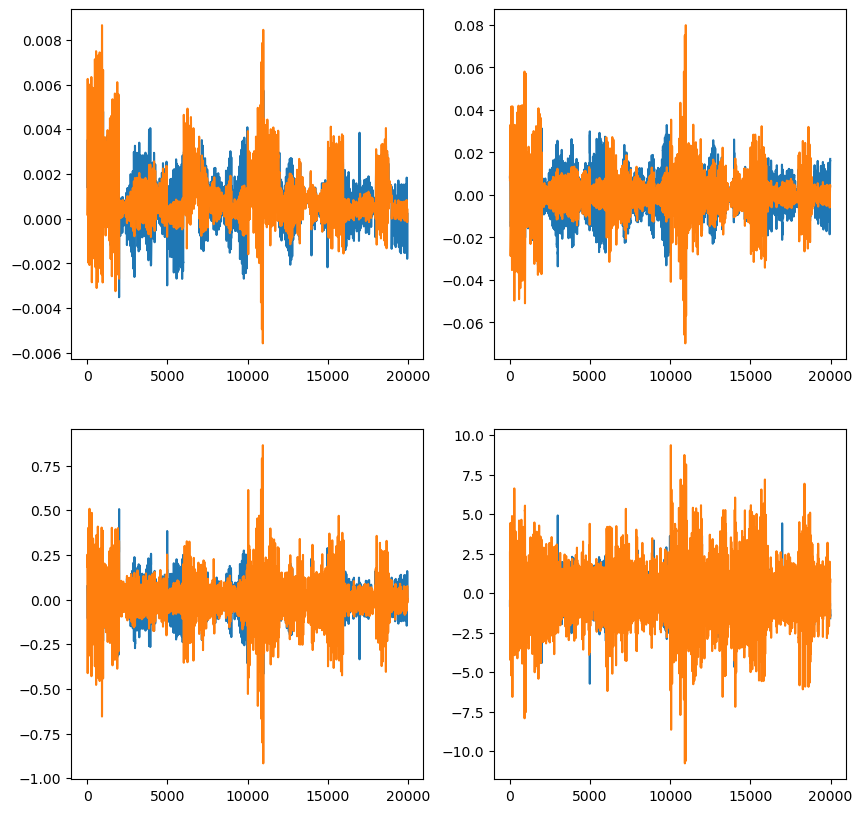

In [61]:
plt.figure(figsize=(10,10))
for i in range(4):
    
    plt.subplot(2,2,i+1)
    plt.plot(y_pred[:,i])
    plt.plot(y_test[:,i])

In [62]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42,max_depth=2).fit(X_train,y_train)
y_pred_xgb=xgb_model.predict(X_test)

In [63]:
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
print('mean absolute error',mae)
print('mean square error',mse)

mean absolute error 0.3359310906720156
mean square error 0.7315873959182608


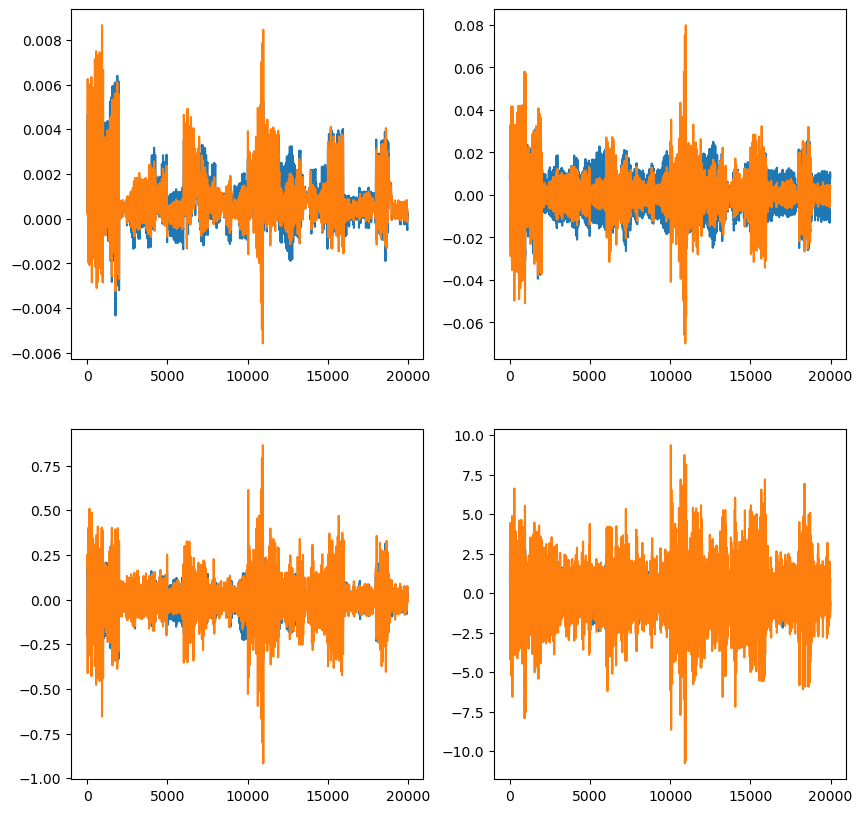

In [64]:
plt.figure(figsize=(10,10))
for i in range(4):
    
    plt.subplot(2,2,i+1)
    plt.plot(y_pred_xgb[:,i])
    plt.plot(y_test[:,i])